# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Dataset/CWC23_all_innings.csv')

In [3]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(1408, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
df.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,562.000000,1408.000000,1408.000000,562.000000,562.000000,562.000000,1408.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,35.305398,33.237216,1.204626,0.070574,0.898755,7.342527,0.256228,5.946637,1.470881,2.605201,0.751773,83.716596,0.151300,42.721040
std,25.248709,28.056329,1.198237,0.152535,0.471051,2.679736,0.532547,2.141566,0.499329,3.146922,1.504184,52.475444,0.358553,41.576908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,1.350000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,5.550000,0.000000,4.500000,1.000000,0.000000,0.000000,51.610000,0.000000,12.000000
50%,32.000000,29.000000,1.000000,0.032258,0.879005,8.000000,0.000000,5.675000,1.000000,2.000000,0.000000,81.810000,0.000000,28.000000
75%,54.000000,49.000000,2.000000,0.062500,1.130819,10.000000,0.000000,7.120000,2.000000,4.000000,1.000000,107.020000,0.000000,60.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


In [6]:
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

Now there is to much missing values in the data set.

In [19]:
df.dtypes

team                object
player              object
bat_or_bowl         object
bb_bf                int64
runs                 int64
wkts               float64
wicketball_prob    float64
runs_per_ball      float64
opposition          object
ground              object
start_date          object
overs              float64
mdns               float64
econ               float64
inns                 int64
4s                 float64
6s                 float64
sr                 float64
not_out            float64
mins               float64
dtype: object

# Exploratory data analysis

## Team-wise Performance Analysis:

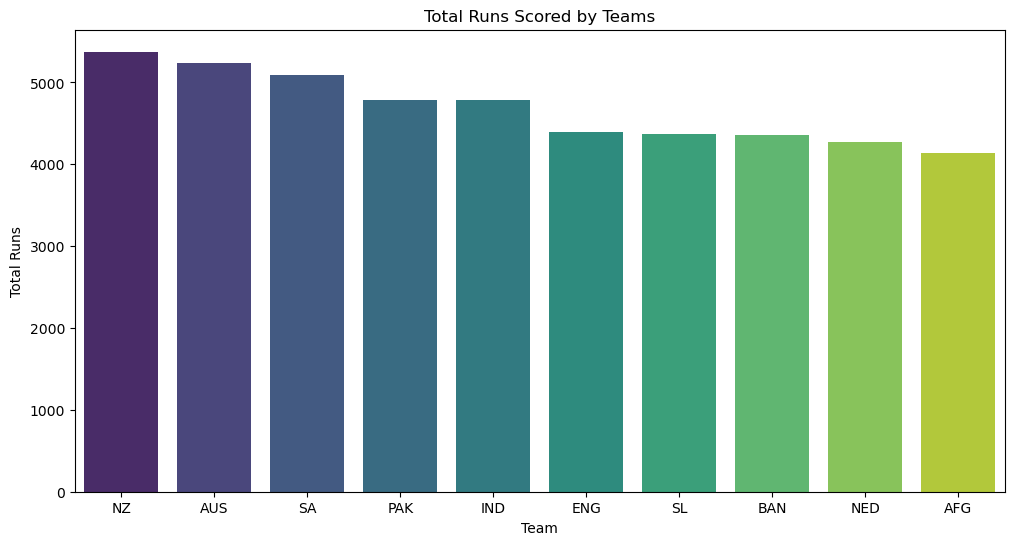

In [23]:
team_runs = df.groupby('team')['runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.index, y=team_runs.values, palette='viridis')
plt.title('Total Runs Scored by Teams')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()


## Player-wise Performance Analysis:

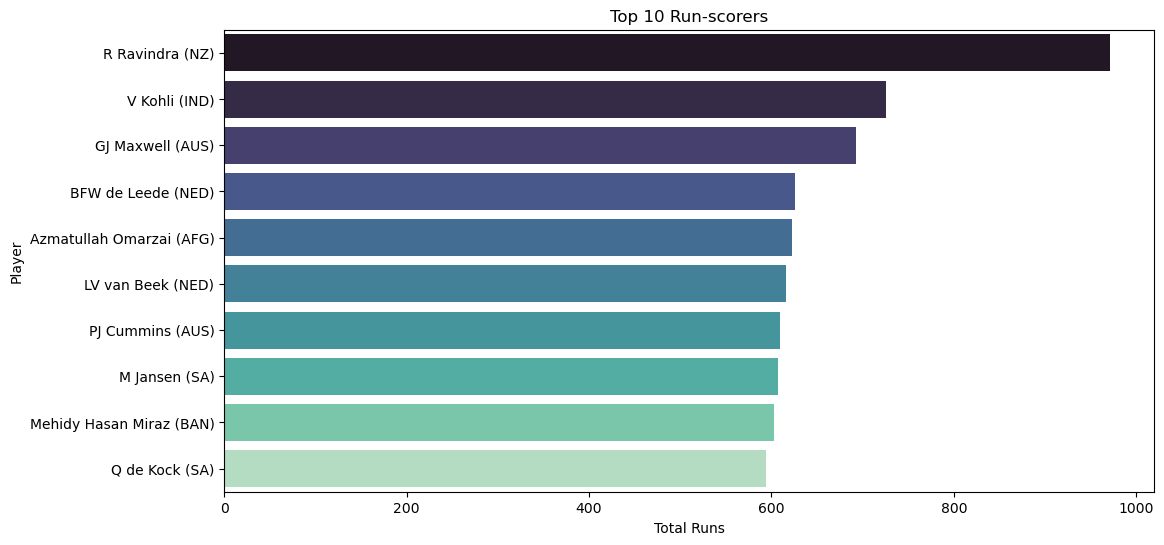

In [24]:
# Top 10 run-scorers
top_scorers = df.groupby('player')['runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='mako')
plt.title('Top 10 Run-scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()


## Top Players with Most "Not Out"

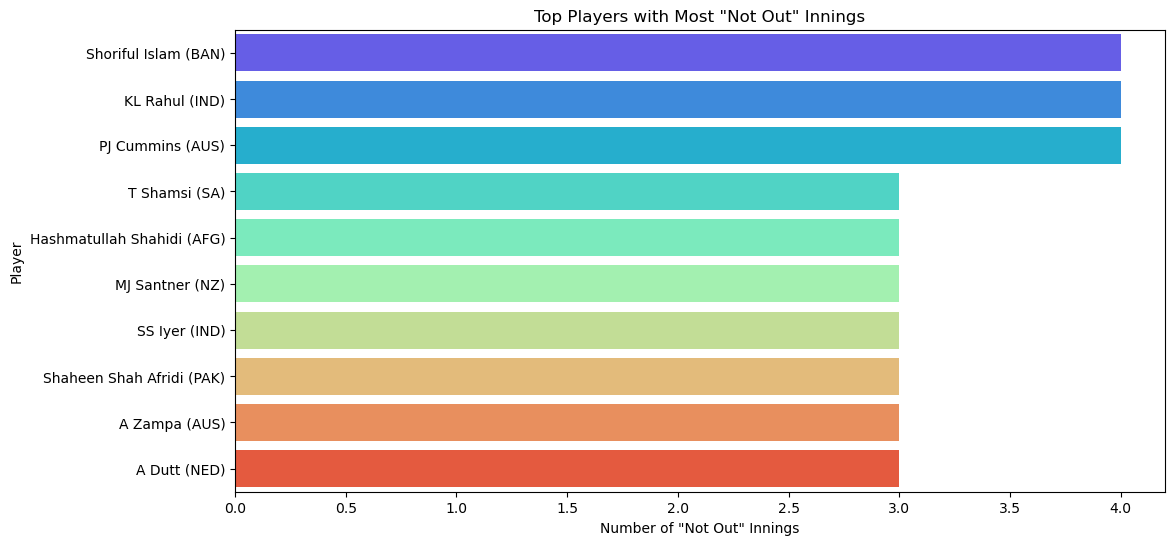

In [45]:
top_not_out_players = df.groupby('player')['not_out'].sum().sort_values(ascending=False).head(10)

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_not_out_players.values, y=top_not_out_players.index, palette='rainbow')
plt.title('Top Players with Most "Not Out" Innings')
plt.xlabel('Number of "Not Out" Innings')
plt.ylabel('Player')
plt.show()


## Team-wise Runs and Wickets Analysis:

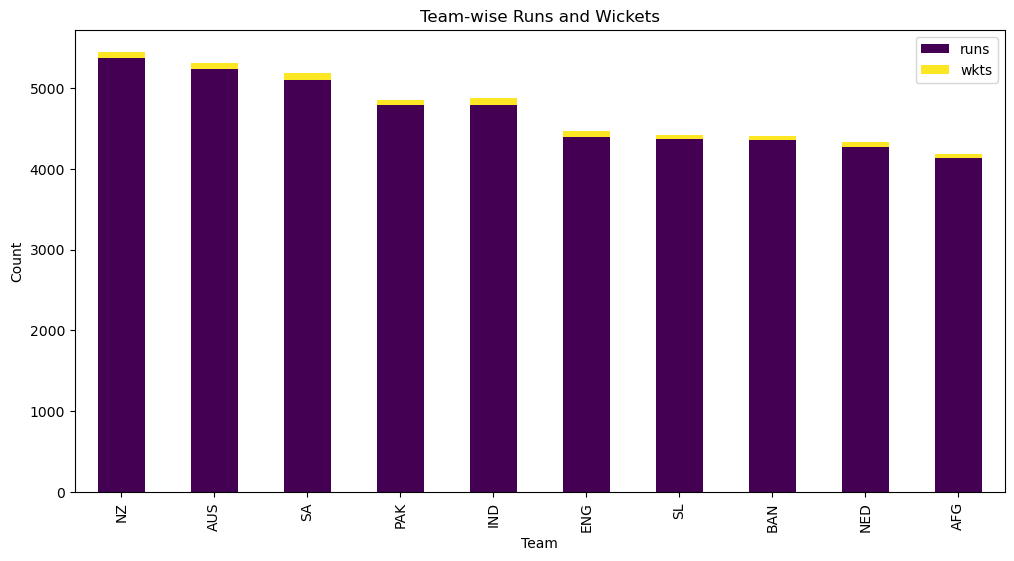

In [29]:
# Team-wise total runs and wickets
team_performance = df.groupby('team').agg({'runs': 'sum', 'wkts': 'sum'}).sort_values(by='runs', ascending=False)
team_performance.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Team-wise Runs and Wickets')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()


In [50]:
team_performance

,runs,wkts
team,,
NZ,5376,71.0
AUS,5234,77.0
SA,5097,88.0
PAK,4786,65.0
IND,4783,94.0
ENG,4396,65.0
SL,4366,50.0
BAN,4358,51.0
NED,4268,63.0


# Insight

#### Top Teams by Runs:
NZ (New Zealand): Leading with 5376 runs.
AUS (Australia): Second with 5234 runs.
SA (South Africa): Third with 5097 runs.


#### Top Teams by Wickets Taken:
IND (India): Leading with 94 wickets.
SA (South Africa): Second with 88 wickets.
AUS (Australia): Third with 77 wickets.

#### Balance of Batting and Bowling:
NZ, AUS, and SA show a good balance between batting and bowling.

#### Comparing Teams:
PAK has a strong bowling performance despite scoring fewer runs than IND.
ENG has a balanced performance similar to PAK.
SL, BAN, NED, and AFG show room for improvement.

#### Overall Performance:
Teams with high totals in both runs and wickets are likely to perform well.

## Top Players with Most Sixes

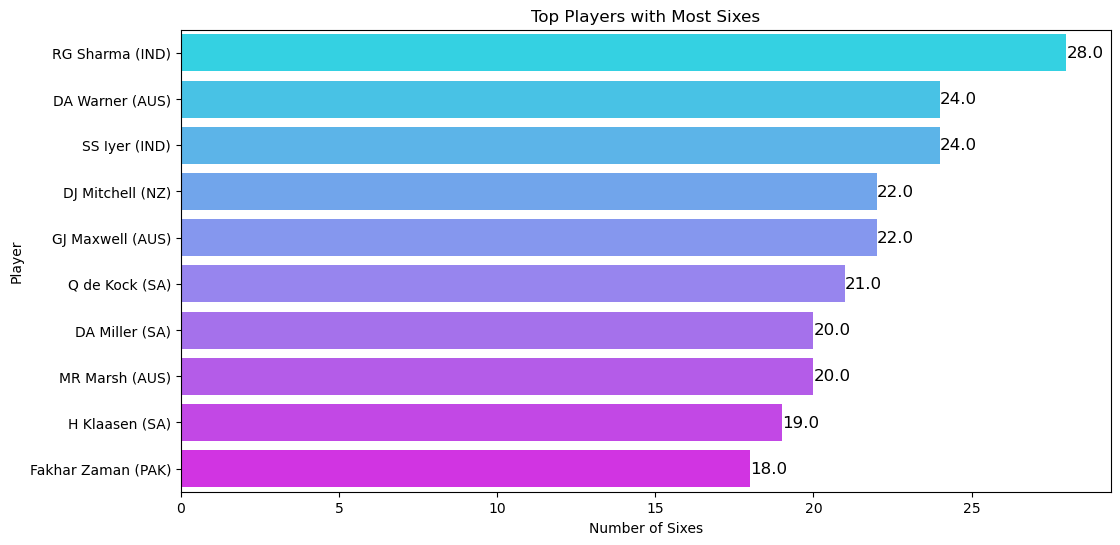

In [48]:
top_six_hitters = df.groupby('player')['6s'].sum().sort_values(ascending=False).head(10)

# Creating a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_six_hitters.values, y=top_six_hitters.index, palette='cool')

# Adding annotations
for index, value in enumerate(top_six_hitters):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12)

plt.title('Top Players with Most Sixes')
plt.xlabel('Number of Sixes')
plt.ylabel('Player')
plt.show()


## Top Wicket-Takers

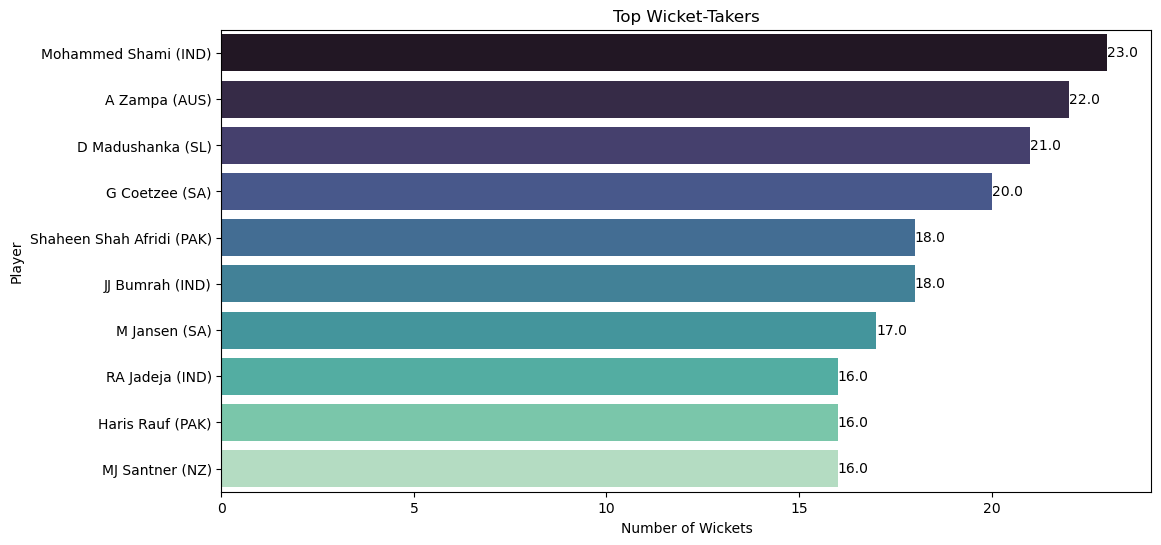

In [51]:

# Sorting players based on the count of wickets taken
top_wicket_takers = df.groupby('player')['wkts'].sum().sort_values(ascending=False).head(10)

# Creating a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='mako')

# Adding annotations
for index, value in enumerate(top_wicket_takers):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top Wicket-Takers')
plt.xlabel('Number of Wickets')
plt.ylabel('Player')
plt.show()


## Top Grounds with High Average Strike Rate

In [ ]:
high_sr_grounds = df.groupby('ground')['sr'].mean().sort_values(ascending=False).head(10)

# Creating a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=high_sr_grounds.values, y=high_sr_grounds.index, palette='viridis')

# Adding annotations
for index, value in enumerate(high_sr_grounds):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.title('Top Grounds with High Average Strike Rate')
plt.xlabel('Average Strike Rate')
plt.ylabel('Ground')
plt.show()


## Batting/Bowling Styles Analysis:

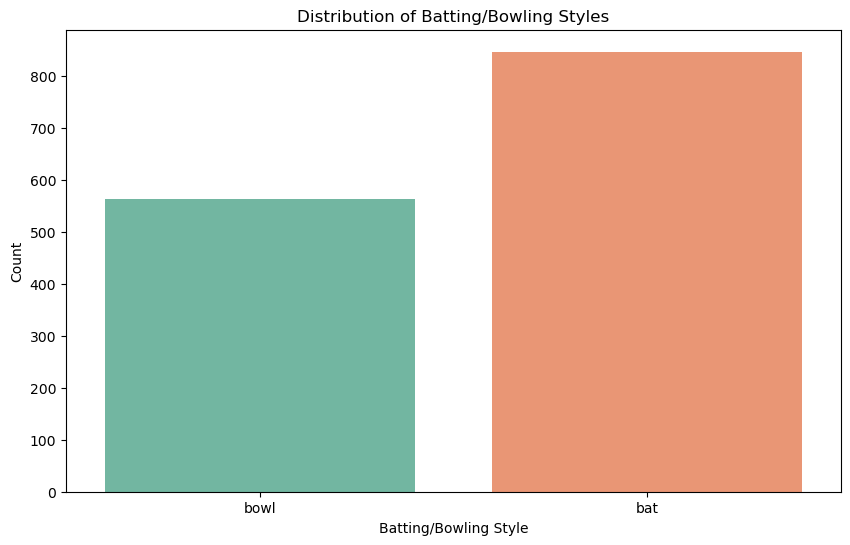

In [25]:
# Batting/Bowling Style distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='bat_or_bowl', data=df, palette='Set2')
plt.title('Distribution of Batting/Bowling Styles')
plt.xlabel('Batting/Bowling Style')
plt.ylabel('Count')
plt.show()


## Opposition and Ground Analysis:

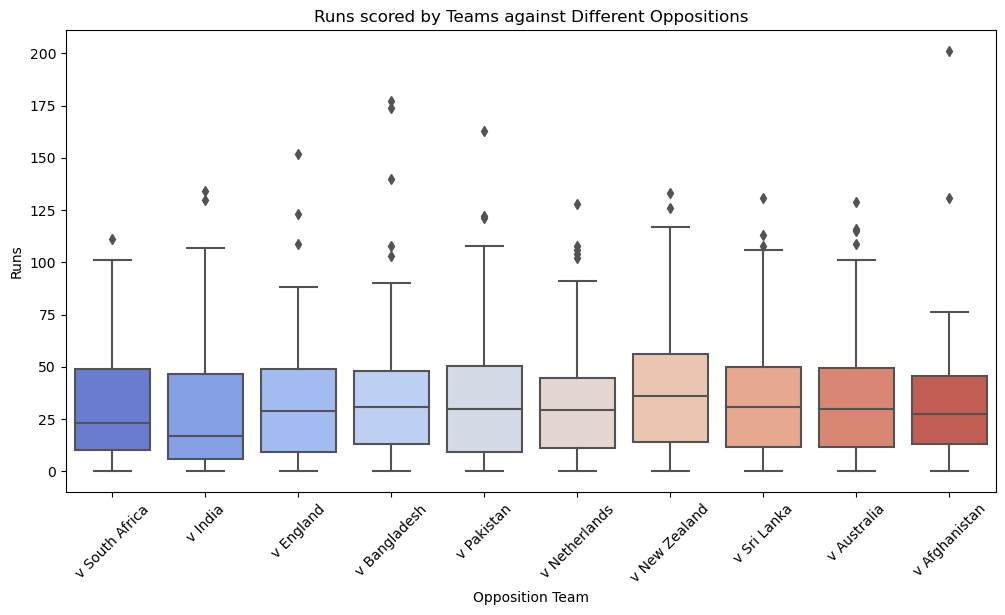

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='opposition', y='runs', data=df, palette='coolwarm')
plt.title('Runs scored by Teams against Different Oppositions')
plt.xlabel('Opposition Team')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()


## Temporal Analysis:


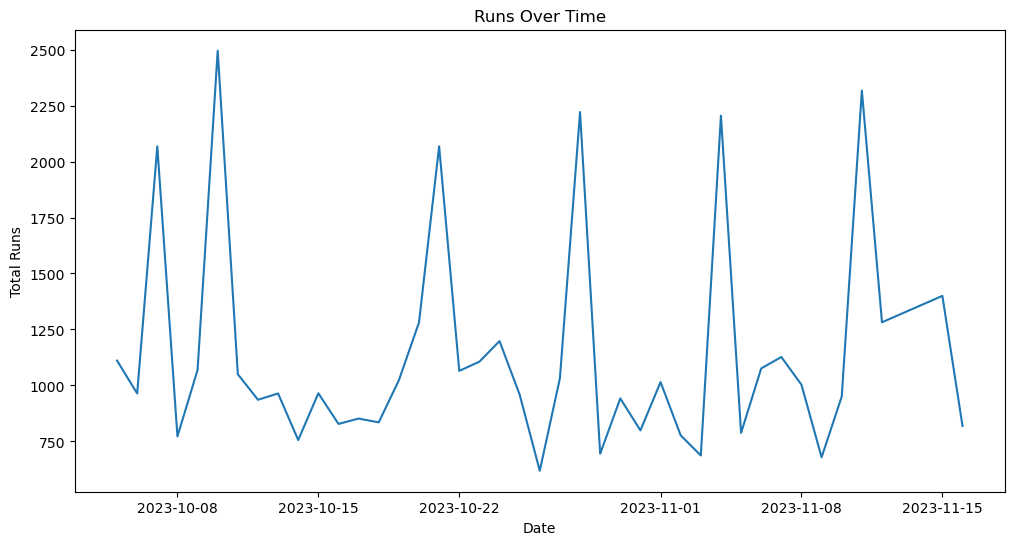

In [27]:
# Time series plot of runs over time
df['start_date'] = pd.to_datetime(df['start_date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', data=df, estimator='sum', ci=None, palette='Blues')
plt.title('Runs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.show()


## Runs Scored and Wickets Taken at Different Grounds:



In [59]:
ground_performance = df.groupby('ground').agg({'runs': 'sum', 'wkts': 'sum'}).sort_values(by='runs', ascending=False)
print(ground_performance)


              runs  wkts
ground                  
Wankhede      5596  72.0
Delhi         5509  74.0
Dharamsala    5189  82.0
Pune          5171  60.0
Bengaluru     5024  64.0
Chennai       4709  69.0
Eden Gardens  4254  81.0
Lucknow       4120  71.0
Ahmedabad     3859  57.0
Hyderabad     3367  47.0


## Heatmap

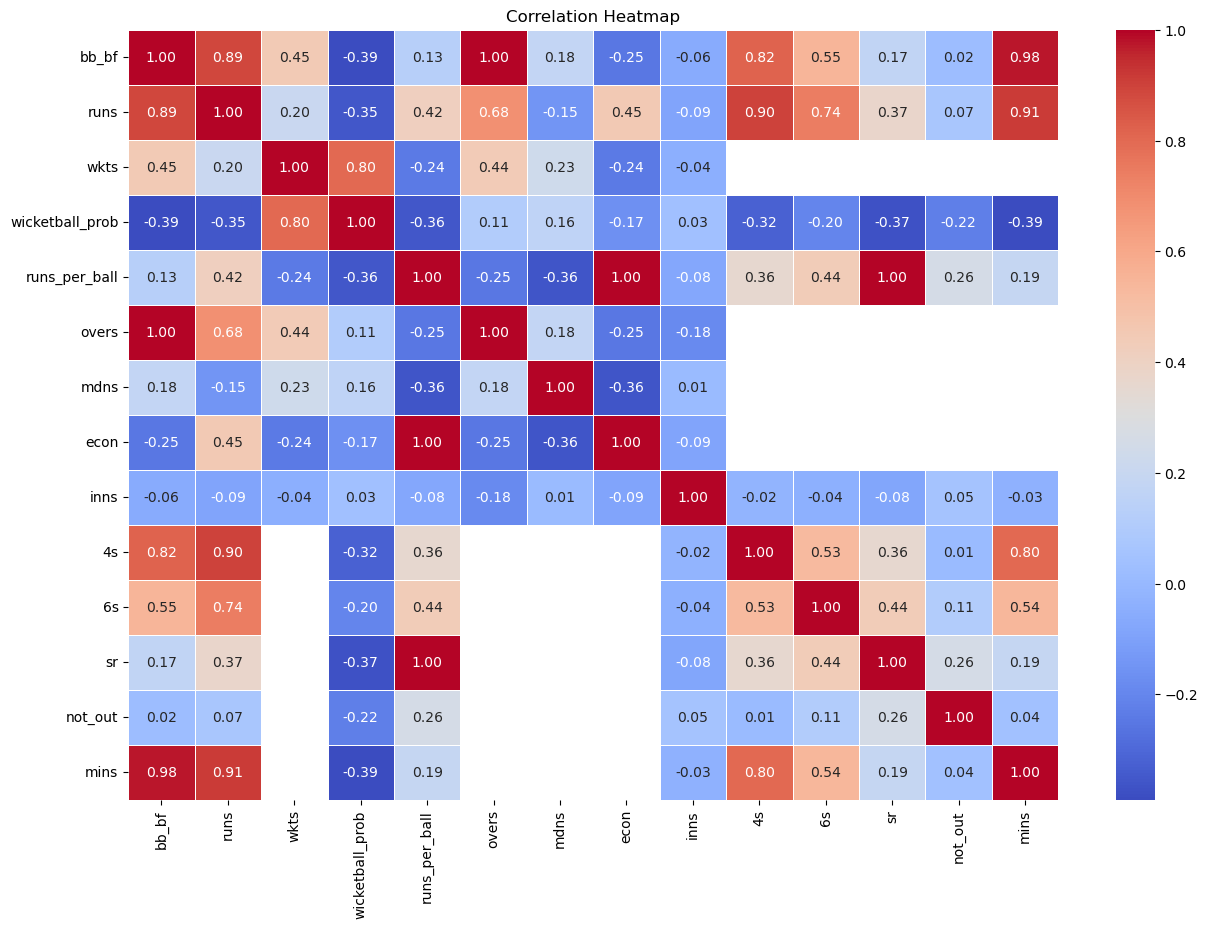

In [65]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Creating a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
